# Import liabraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
from sklearn import metrics

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
from sklearn import metrics



# Data Understanding

In [6]:
#Load dataset
telecom_df=pd.read_csv("telecom_churn_data.csv")
telecom_df

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.40,0.00,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.00,0.00,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.00,0.00,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.00,0.00,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,7001548952,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,18.471,...,0,NaN,NaN,NaN,NaN,3199,0.00,0.00,0.00,0.00
99995,7000607688,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,112.201,...,0,NaN,NaN,NaN,NaN,2052,0.00,0.00,0.00,0.00
99996,7000087541,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,229.187,...,0,1.0,NaN,NaN,NaN,185,0.00,0.00,0.00,0.00
99997,7000498689,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,322.991,...,0,1.0,1.0,1.0,1.0,478,1445.74,1151.03,1173.18,0.00


In [8]:
#Lokking intial rows of the data
telecom_df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [9]:
# Last 5 rows of the data
telecom_df.tail()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
99994,7001548952,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,18.471,...,0,NaN,NaN,NaN,NaN,3199,0.00,0.00,0.00,0.0
99995,7000607688,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,112.201,...,0,NaN,NaN,NaN,NaN,2052,0.00,0.00,0.00,0.0
99996,7000087541,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,229.187,...,0,1.0,NaN,NaN,NaN,185,0.00,0.00,0.00,0.0
99997,7000498689,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,322.991,...,0,1.0,1.0,1.0,1.0,478,1445.74,1151.03,1173.18,0.0
99998,7001905007,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,687.065,...,0,1.0,NaN,NaN,NaN,751,0.00,0.00,0.00,0.0


In [10]:
#Check the columns of data
telecom_df.columns

Index(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou',
       'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7',
       'last_date_of_month_8', 'last_date_of_month_9', 'arpu_6',
       ...
       'sachet_3g_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9',
       'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g'],
      dtype='object', length=226)

In [11]:
telecom_df.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,...,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,7.001207e+09,109.0,0.0,0.0,0.0,282.987358,278.536648,279.154731,261.645069,132.395875,...,0.084581,0.914404,0.908764,0.890808,0.860968,1219.854749,68.170248,66.839062,60.021204,3.299373
std,6.956694e+05,0.0,0.0,0.0,0.0,328.439770,338.156291,344.474791,341.998630,297.207406,...,0.650457,0.279772,0.287950,0.311885,0.345987,954.733842,267.580450,271.201856,253.938223,32.408353
min,7.000000e+09,109.0,0.0,0.0,0.0,-2258.709000,-2014.045000,-945.808000,-1899.505000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000606e+09,109.0,0.0,0.0,0.0,93.411500,86.980500,84.126000,62.685000,7.380000,...,0.000000,1.000000,1.000000,1.000000,1.000000,467.000000,0.000000,0.000000,0.000000,0.000000
50%,7.001205e+09,109.0,0.0,0.0,0.0,197.704000,191.640000,192.080000,176.849000,34.310000,...,0.000000,1.000000,1.000000,1.000000,1.000000,863.000000,0.000000,0.000000,0.000000,0.000000
75%,7.001812e+09,109.0,0.0,0.0,0.0,371.060000,365.344500,369.370500,353.466500,118.740000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1807.500000,0.000000,0.000000,0.000000,0.000000
max,7.002411e+09,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,38805.617000,7376.710000,...,49.000000,1.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.210000,2618.570000


In [12]:
telecom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [13]:
# Checking for null values
telecom_df.isnull().sum()

mobile_number        0
circle_id            0
loc_og_t2o_mou    1018
std_og_t2o_mou    1018
loc_ic_t2o_mou    1018
                  ... 
aon                  0
aug_vbc_3g           0
jul_vbc_3g           0
jun_vbc_3g           0
sep_vbc_3g           0
Length: 226, dtype: int64

In [14]:
# Checking the null value percentage
telecom_df.isna().sum()/telecom_df.isna().count()*100

mobile_number     0.00000
circle_id         0.00000
loc_og_t2o_mou    1.01801
std_og_t2o_mou    1.01801
loc_ic_t2o_mou    1.01801
                   ...   
aon               0.00000
aug_vbc_3g        0.00000
jul_vbc_3g        0.00000
jun_vbc_3g        0.00000
sep_vbc_3g        0.00000
Length: 226, dtype: float64

In [15]:
#Checking shape of the dataset
telecom_df.shape

(99999, 226)

In [16]:
#Checking for the duplicates
telecom_df.drop_duplicates(subset=None, inplace=True)
telecom_df.shape

(99999, 226)

In [17]:
#Size of the data
telecom_df.size

22599774

In [33]:
#list of columns
pd.DataFrame(telecom_df.columns)


,0
0,mobile_number
1,circle_id
2,loc_og_t2o_mou
3,std_og_t2o_mou
4,loc_ic_t2o_mou
5,last_date_of_month_6
6,last_date_of_month_7
7,last_date_of_month_8
8,last_date_of_month_9
9,arpu_6


# Data cleaning and imputing missing values

In [18]:
# look at missing value ratio in each column
telecom_df.isnull().sum()*100/telecom_df.shape[0]

mobile_number     0.00000
circle_id         0.00000
loc_og_t2o_mou    1.01801
std_og_t2o_mou    1.01801
loc_ic_t2o_mou    1.01801
                   ...   
aon               0.00000
aug_vbc_3g        0.00000
jul_vbc_3g        0.00000
jun_vbc_3g        0.00000
sep_vbc_3g        0.00000
Length: 226, dtype: float64

As We can see more then 74% values for recharge related data are missing.

In [19]:
# some recharge columns have minimum value of 1 while some don't have
recharge_cols = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9',
                 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9',
                 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'count_rech_3g_9',
                 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9',
                 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9',
                 ]

telecom_df[recharge_cols].describe(include='all')

,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9
count,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.00000,25153.000000,25571.000000,26339.000000,25922.000000
mean,2.463802,2.666419,2.651999,2.441170,1.864668,2.044699,2.016288,1.781807,0.599133,0.621720,0.635711,0.659363,126.393392,126.729459,125.717301,124.94144,192.600982,200.981292,197.526489,192.734315
std,2.789128,3.031593,3.074987,2.516339,2.570254,2.768332,2.720132,2.214701,1.274428,1.394524,1.422827,1.411513,108.477235,109.765267,109.437851,111.36376,192.646318,196.791224,191.301305,188.400286
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.00000,1.000000,0.500000,0.500000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,25.000000,25.000000,25.000000,25.00000,82.000000,92.000000,87.000000,69.000000
50%,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,145.000000,145.000000,145.000000,145.00000,154.000000,154.000000,154.000000,164.000000
75%,3.000000,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,177.000000,177.000000,179.000000,179.00000,252.000000,252.000000,252.000000,252.000000
max,61.000000,54.000000,60.000000,84.000000,42.000000,48.000000,44.000000,40.000000,29.000000,35.000000,45.000000,49.000000,1555.000000,1555.000000,1555.000000,1555.00000,7546.000000,4365.000000,4076.000000,4061.000000


In [20]:
# It is also observed that the recharge date and the recharge value are missing together which means the customer didn't recharge
telecom_df.loc[telecom_df.total_rech_data_6.isnull() & telecom_df.date_of_last_rech_data_6.isnull(), ["total_rech_data_6", "date_of_last_rech_data_6"]].head(20)

,total_rech_data_6,date_of_last_rech_data_6
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
5,NaN,NaN
6,NaN,NaN
7,NaN,NaN
8,NaN,NaN
9,NaN,NaN
10,NaN,NaN
11,NaN,NaN


In [21]:
# create a list of recharge columns where we will impute missing values with zeroes
zero_impute = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9',
        'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9',
        'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9'
       ]

In [22]:
# impute missing values with 0
telecom_df[zero_impute] = telecom_df[zero_impute].apply(lambda x: x.fillna(0))

In [23]:
# now we can check the "statistics Summary"
telecom_df[zero_impute].describe(include='all')

,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9
count,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,0.619726,0.681837,0.698517,0.632806,48.445409,51.393440,52.027022,49.961089,31.792048,32.406314,33.113011,32.387644
std,1.760541,1.924382,1.963417,1.669040,127.743863,132.629365,131.182609,127.804280,77.248778,78.342435,78.872739,78.818696
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,8.250000,17.000000,23.000000,17.000000,8.000000,14.000000,17.000000,17.000000
max,61.000000,54.000000,60.000000,84.000000,7546.000000,4365.000000,4076.000000,4061.000000,1555.000000,1555.000000,1555.000000,1555.000000


In [24]:
# now we can create some column name list by there types using description of columns
id_cols = ['mobile_number', 'circle_id']

date_cols = ['last_date_of_month_6',
             'last_date_of_month_7',
             'last_date_of_month_8',
             'last_date_of_month_9',
             'date_of_last_rech_6',
             'date_of_last_rech_7',
             'date_of_last_rech_8',
             'date_of_last_rech_9',
             'date_of_last_rech_data_6',
             'date_of_last_rech_data_7',
             'date_of_last_rech_data_8',
             'date_of_last_rech_data_9'
            ]

cat_cols =  ['night_pck_user_6',
             'night_pck_user_7',
             'night_pck_user_8',
             'night_pck_user_9',
             'fb_user_6',
             'fb_user_7',
             'fb_user_8',
             'fb_user_9'
            ]

num_cols = [column for column in telecom_df.columns if column not in id_cols + date_cols + cat_cols]

# print the number of columns in each list
print("#ID cols: %d\n#Date cols:%d\n#Numeric cols:%d\n#Category cols:%d" % (len(id_cols), len(date_cols), len(num_cols), len(cat_cols)))

# check if we have missed any column or not
print(len(id_cols) + len(date_cols) + len(num_cols) + len(cat_cols) == telecom_df.shape[1])

#ID cols: 2
#Date cols:12
#Numeric cols:204
#Category cols:8
True


In [25]:
# drop id and date columns
telecom_df= telecom_df.drop(id_cols + date_cols, axis=1)
#check the shape again
telecom_df.shape

(99999, 212)

In [26]:
# replace missing values with '-1' in categorical columns
telecom_df[cat_cols] = telecom_df[cat_cols].apply(lambda x: x.fillna(-1))

In [27]:
# missing value ratio
telecom_df[cat_cols].isnull().sum()*100/telecom_df.shape[0]

night_pck_user_6    0.0
night_pck_user_7    0.0
night_pck_user_8    0.0
night_pck_user_9    0.0
fb_user_6           0.0
fb_user_7           0.0
fb_user_8           0.0
fb_user_9           0.0
dtype: float64

Droping variables with more than 70% of missing values

In [28]:
initial_cols = telecom_df.shape[1]

MISSING_THRESHOLD = 0.7

include_cols = list(telecom_df.apply(lambda column: True if column.isnull().sum()/telecom_df.shape[0] < MISSING_THRESHOLD else False))

drop_missing = pd.DataFrame({'features':telecom_df.columns , 'include': include_cols})
drop_missing.loc[drop_missing.include == True,:]

,features,include
0,loc_og_t2o_mou,True
1,std_og_t2o_mou,True
2,loc_ic_t2o_mou,True
3,arpu_6,True
4,arpu_7,True
...,...,...
207,aon,True
208,aug_vbc_3g,True
209,jul_vbc_3g,True
210,jun_vbc_3g,True


In [29]:
# now we can drop  some more columns
telecom_df = telecom_df.loc[:, include_cols]

dropped_cols = telecom_df.shape[1] - initial_cols
dropped_cols

-16

In [30]:
#rechecking the shape of a dataframe
telecom_df.shape

(99999, 196)

In [31]:
# rechecking the missing values for how many missing values has left
telecom_df.isnull().sum()*100/telecom_df.shape[0]

loc_og_t2o_mou    1.01801
std_og_t2o_mou    1.01801
loc_ic_t2o_mou    1.01801
arpu_6            0.00000
arpu_7            0.00000
                   ...   
aon               0.00000
aug_vbc_3g        0.00000
jul_vbc_3g        0.00000
jun_vbc_3g        0.00000
sep_vbc_3g        0.00000
Length: 196, dtype: float64

In [32]:
num_cols = [column for column in telecom_df.columns if column not in id_cols + date_cols + cat_cols]
num_cols

['loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'arpu_9',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'onnet_mou_9',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'offnet_mou_9',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_ic_mou_9',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'roam_og_mou_9',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_t2c_mou_9',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'loc_og_mou_9',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_

In [33]:
#imputing with meadian for num_cols
telecom_df[num_cols] = telecom_df[num_cols].apply(lambda x: x.fillna(x.median()))

In [34]:
#again checking for the missing values
telecom_df.isnull().sum()*100/telecom_df.shape[0]

loc_og_t2o_mou    0.0
std_og_t2o_mou    0.0
loc_ic_t2o_mou    0.0
arpu_6            0.0
arpu_7            0.0
                 ... 
aon               0.0
aug_vbc_3g        0.0
jul_vbc_3g        0.0
jun_vbc_3g        0.0
sep_vbc_3g        0.0
Length: 196, dtype: float64

# Filter high value customers

In [37]:
# calculate the total data recharge amount for June and July --> number of recharges * average recharge amount
telecom_df['total_data_rech_6'] = telecom_df.total_rech_data_6 * telecom_df.av_rech_amt_data_6
telecom_df['total_data_rech_7'] = telecom_df.total_rech_data_7 * telecom_df.av_rech_amt_data_7


In [38]:
# calculate total recharge amount for June and July --> call recharge amount + data recharge amount
telecom_df['amt_data_6'] = telecom_df.total_rech_amt_6 + telecom_df.total_data_rech_6
telecom_df['amt_data_7'] = telecom_df.total_rech_amt_7 + telecom_df.total_data_rech_7

In [39]:
# calculate average recharge done by customer in June and July
telecom_df['av_amt_data_6_7'] = (telecom_df.amt_data_6 + telecom_df.amt_data_7)/2

In [40]:
# look at the 70th percentile recharge amount
print("Recharge amount at 70th percentile: {0}".format(telecom_df.av_amt_data_6_7.quantile(0.7)))

Recharge amount at 70th percentile: 478.0


In [41]:
# retain only those customers who have recharged their mobiles with more than or equal to 70th percentile amount
telecom_df_filtered = telecom_df.loc[telecom_df.av_amt_data_6_7 >= telecom_df.av_amt_data_6_7.quantile(0.7), :]
telecom_df_filtered = telecom_df_filtered.reset_index(drop=True)

In [42]:
telecom_df_filtered.shape

(30001, 201)

In [43]:
# delete variables created to filter high-value customers
telecom_df_filtered = telecom_df_filtered.drop(['total_data_rech_6', 'total_data_rech_7',
                                      'amt_data_6', 'amt_data_7', 'av_amt_data_6_7'], axis=1)

In [44]:
telecom_df_filtered.shape

(30001, 196)

# Derive churn

In [45]:
# Selecting the columns to define churn variable (i.e. TARGET Variable)
churn_col=['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']
telecom_df_filtered[churn_col].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   total_ic_mou_9  30001 non-null  float64
 1   total_og_mou_9  30001 non-null  float64
 2   vol_2g_mb_9     30001 non-null  float64
 3   vol_3g_mb_9     30001 non-null  float64
dtypes: float64(4)
memory usage: 937.7 KB


In [46]:
# Initializing the churn variable.
telecom_df_filtered['churn']=0

# Imputing the churn values based on the condition
telecom_df_filtered['churn'] = np.where(telecom_df_filtered[churn_col].sum(axis=1) == 0, 1, 0)

In [47]:
# Checking the top 10 data
telecom_df_filtered.head(10)

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,...,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn
0,0.0,0.0,0.0,197.385,214.816,213.803,21.100,34.31,32.33,0.00,...,1.0,1.0,1.0,-1.0,968,30.40,0.00,101.20,3.58,1
1,0.0,0.0,0.0,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,...,-1.0,-1.0,-1.0,-1.0,802,57.74,19.38,18.74,0.00,1
2,0.0,0.0,0.0,378.721,492.223,137.362,166.787,413.69,351.03,35.08,...,-1.0,1.0,1.0,-1.0,315,21.03,910.65,122.16,0.00,0
3,0.0,0.0,0.0,514.453,597.753,637.760,578.596,102.41,132.11,85.14,...,-1.0,-1.0,-1.0,-1.0,720,0.00,0.00,0.00,0.00,0
4,0.0,0.0,0.0,74.350,193.897,366.966,811.480,48.96,50.66,33.58,...,-1.0,1.0,1.0,1.0,604,40.45,51.86,0.00,0.00,0
5,0.0,0.0,0.0,977.020,2362.833,409.230,799.356,0.00,0.00,0.00,...,1.0,1.0,1.0,1.0,1328,358.10,2706.83,1714.67,0.00,0
6,0.0,0.0,0.0,363.987,486.558,393.909,391.709,248.99,619.96,666.38,...,-1.0,-1.0,-1.0,0.0,1155,0.00,0.00,0.00,0.00,0
7,0.0,0.0,0.0,482.832,425.764,229.769,143.596,86.39,118.88,80.44,...,-1.0,-1.0,-1.0,-1.0,2010,0.00,0.00,0.00,0.00,0
8,0.0,0.0,0.0,1873.271,575.927,179.218,1189.744,2061.69,881.43,156.91,...,-1.0,-1.0,-1.0,-1.0,1265,0.00,0.00,0.00,0.00,0
9,0.0,0.0,0.0,978.077,1141.296,706.020,1076.247,135.14,119.59,102.69,...,1.0,0.0,0.0,0.0,697,0.00,0.00,0.00,0.00,0


0    27.560276
1     2.441024
Name: churn, dtype: float64


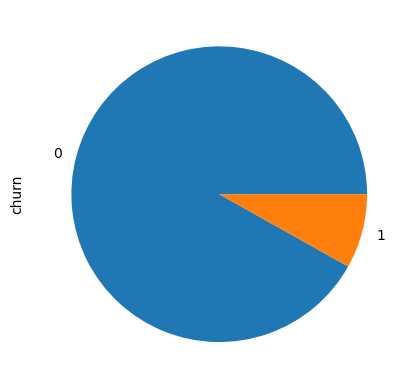

In [48]:
# lets find out churn/non churn percentage
print((telecom_df_filtered['churn'].value_counts()/len(telecom_df))*100)
((telecom_df_filtered['churn'].value_counts()/len(telecom_df))*100).plot(kind="pie")
plt.show()

*As we can see that 97% of the customers do not churn, there is a possibility of class imbalance*


In [49]:
# Selecting all the churn phase columns in order to drop then

churn_phase_cols = [col for col in telecom_df_filtered.columns if '_9' in col]
print("The columns from churn phase are:\n",churn_phase_cols)

The columns from churn phase are:
 ['arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'std_og_t2c_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_t2o_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9', 'last_day_rch_amt_9', 'total_rech_data_9', 'max_rech_data_9', 'av_rech_amt_data_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'night_pck_user_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9', 'fb_user_9']


In [50]:
# Dropping the selected churn phase columns
telecom_df_filtered.drop(churn_phase_cols, axis=1, inplace=True)

# The curent dimension of the dataset after dropping the churn related columns
telecom_df_filtered.shape

(30001, 150)

In [51]:
#churn['total_rech_amt_data_6']=churn['av_rech_amt_data_6'] * churn['total_rech_data_6']
# churn['total_rech_amt_data_7']=churn['av_rech_amt_data_7'] * churn['total_rech_data_7']

# # Calculating the overall recharge amount for the months 6,7,8 and 9

# churn['overall_rech_amt_6'] = churn['total_rech_amt_data_6'] + churn['total_rech_amt_6']
# churn['overall_rech_amt_7'] = churn['total_rech_amt_data_7'] + churn['total_rech_amt_7']

telecom_df_filtered.drop(['av_rech_amt_data_6',
                   'total_rech_data_6','total_rech_amt_6',
                  'av_rech_amt_data_7',
                   'total_rech_data_7','total_rech_amt_7'], axis=1, inplace=True)

In [52]:
# creating a list of column names for each month
mon_6_cols = [col for col in telecom_df_filtered.columns if '_6' in col]
mon_7_cols = [col for col in telecom_df_filtered.columns if '_7' in col]
mon_8_cols = [col for col in telecom_df_filtered.columns if '_8' in col]

In [83]:
# lets check the correlation amongst the independent variables, drop the highly correlated ones
churn_corr = telecom_df_filtered.corr()
churn_corr.loc[:,:] = np.tril(churn_corr, k=-1)
churn_corr = churn_corr.stack()
churn_corr
churn_corr[(churn_corr > 0.80) | (churn_corr < -0.80)].sort_values(ascending=False)

fb_user_6           night_pck_user_6     0.956620
fb_user_7           night_pck_user_7     0.956322
total_rech_amt_8    arpu_8               0.955351
fb_user_8           night_pck_user_8     0.954831
isd_og_mou_8        isd_og_mou_7         0.943120
                    isd_og_mou_6         0.918187
isd_og_mou_7        isd_og_mou_6         0.915247
sachet_2g_8         total_rech_data_8    0.900629
total_ic_mou_6      loc_ic_mou_6         0.895069
total_ic_mou_8      loc_ic_mou_8         0.893149
total_ic_mou_7      loc_ic_mou_7         0.883005
std_og_t2t_mou_8    onnet_mou_8          0.860771
std_og_t2t_mou_7    onnet_mou_7          0.860381
std_og_t2t_mou_6    onnet_mou_6          0.859471
std_og_t2m_mou_7    offnet_mou_7         0.855018
std_og_t2m_mou_8    offnet_mou_8         0.851995
total_og_mou_8      std_og_mou_8         0.851063
total_og_mou_7      std_og_mou_7         0.849570
loc_ic_mou_8        loc_ic_t2m_mou_8     0.846955
std_ic_mou_8        std_ic_t2m_mou_8     0.845795


In [53]:
col_to_drop=['fb_user_6','fb_user_7','fb_user_8','total_rech_amt_8','isd_og_mou_8',
             'sachet_2g_8','isd_og_mou_8','total_ic_mou_6','total_ic_mou_8','total_ic_mou_7',               
               'std_og_t2t_mou_8','std_og_t2t_mou_7','total_og_mou_8','std_og_t2m_mou_8' ,'total_og_mou_7',
             'std_ic_mou_8','std_og_t2t_mou_6' ,'std_og_t2m_mou_7','std_ic_mou_7',]

# These columns can be dropped as they are highly collinered with other predictor variables.
# criteria set is for collinearity of 85%

#  dropping these column
telecom_df_filtered.drop(col_to_drop, axis=1, inplace=True)

In [54]:
# The curent dimension of the dataset after dropping few unwanted columns
telecom_df_filtered.shape

(30001, 126)

# Data preparation
i.Deriving new variables to understand the data
ii.EDA

In [55]:
# We have a column called 'aon'

# we can derive new variables from this to explain the data w.r.t churn.

# creating a new variable 'tenure'
telecom_df_filtered['tenure'] = (telecom_df_filtered['aon']/30).round(0)

# Since we derived a new column from 'aon', we can drop it
telecom_df_filtered.drop('aon',axis=1, inplace=True)

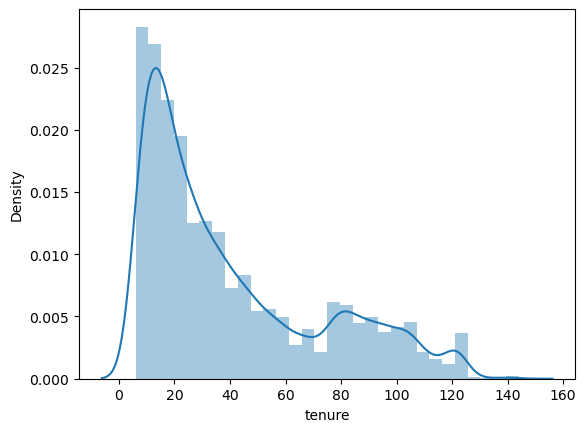

In [56]:
# Checking the distribution of he tenure variable

sns.distplot(telecom_df_filtered['tenure'],bins=30)
plt.show()

In [57]:
tn_range = [0, 6, 12, 24, 60, 61]
tn_label = [ '0-6 Months', '6-12 Months', '1-2 Yrs', '2-5 Yrs', '5 Yrs and above']
telecom_df_filtered['tenure_range'] = pd.cut(telecom_df_filtered['tenure'], tn_range, labels=tn_label)
telecom_df_filtered['tenure_range'].head()

0        2-5 Yrs
1        2-5 Yrs
2    6-12 Months
3        1-2 Yrs
4        1-2 Yrs
Name: tenure_range, dtype: category
Categories (5, object): ['0-6 Months' < '6-12 Months' < '1-2 Yrs' < '2-5 Yrs' < '5 Yrs and above']

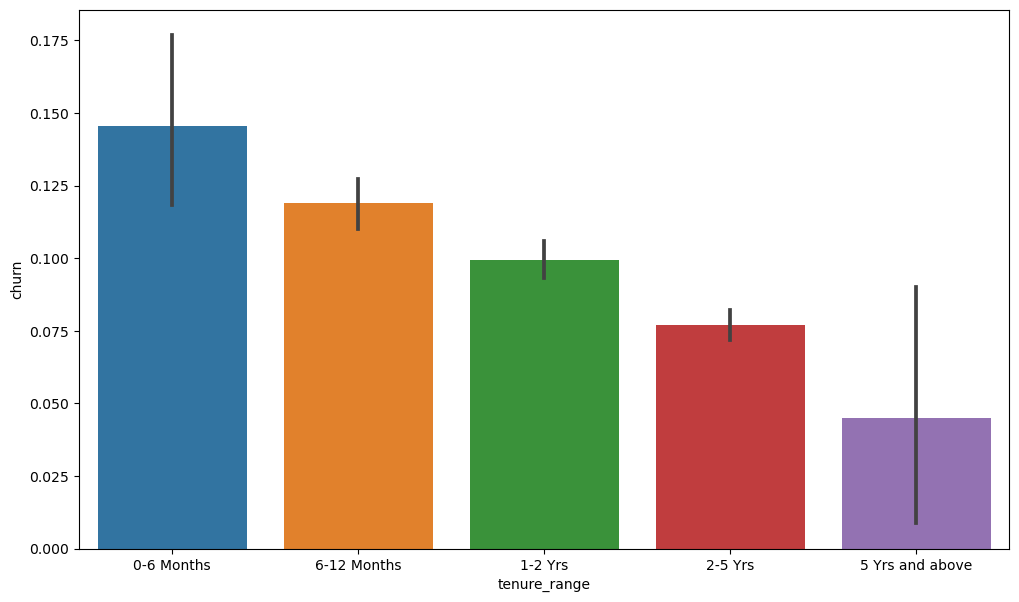

In [58]:
# Plotting a bar plot for tenure range
plt.figure(figsize=[12,7])
sns.barplot(x='tenure_range',y='churn', data=telecom_df_filtered)
plt.show()

In [59]:
telecom_df_filtered["avg_arpu_6_7"]= (telecom_df_filtered['arpu_6']+telecom_df_filtered['arpu_7'])/2
telecom_df_filtered['avg_arpu_6_7'].head()

0     206.1005
1    1209.5150
2     435.4720
3     556.1030
4     134.1235
Name: avg_arpu_6_7, dtype: float64

In [60]:
# Lets drop the original columns as they are derived to a new column for better understanding of the data

telecom_df_filtered.drop(['arpu_6','arpu_7'], axis=1, inplace=True)


# The curent dimension of the dataset after dropping few unwanted columns
telecom_df_filtered.shape

(30001, 126)

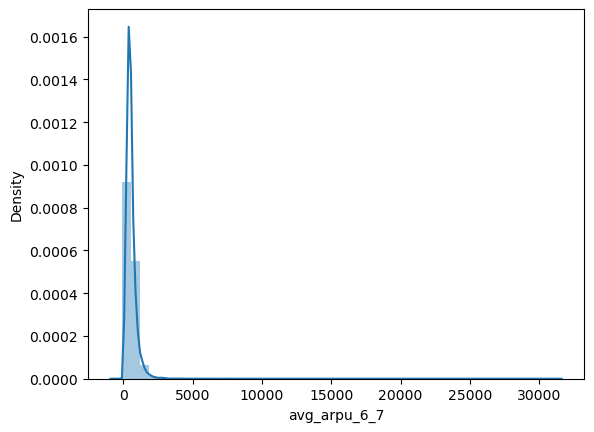

In [61]:
# Visualizing the column created
sns.distplot(telecom_df_filtered['avg_arpu_6_7'])
plt.show()

Text(0.5, 1.0, 'Features Correlating with Churn variable')

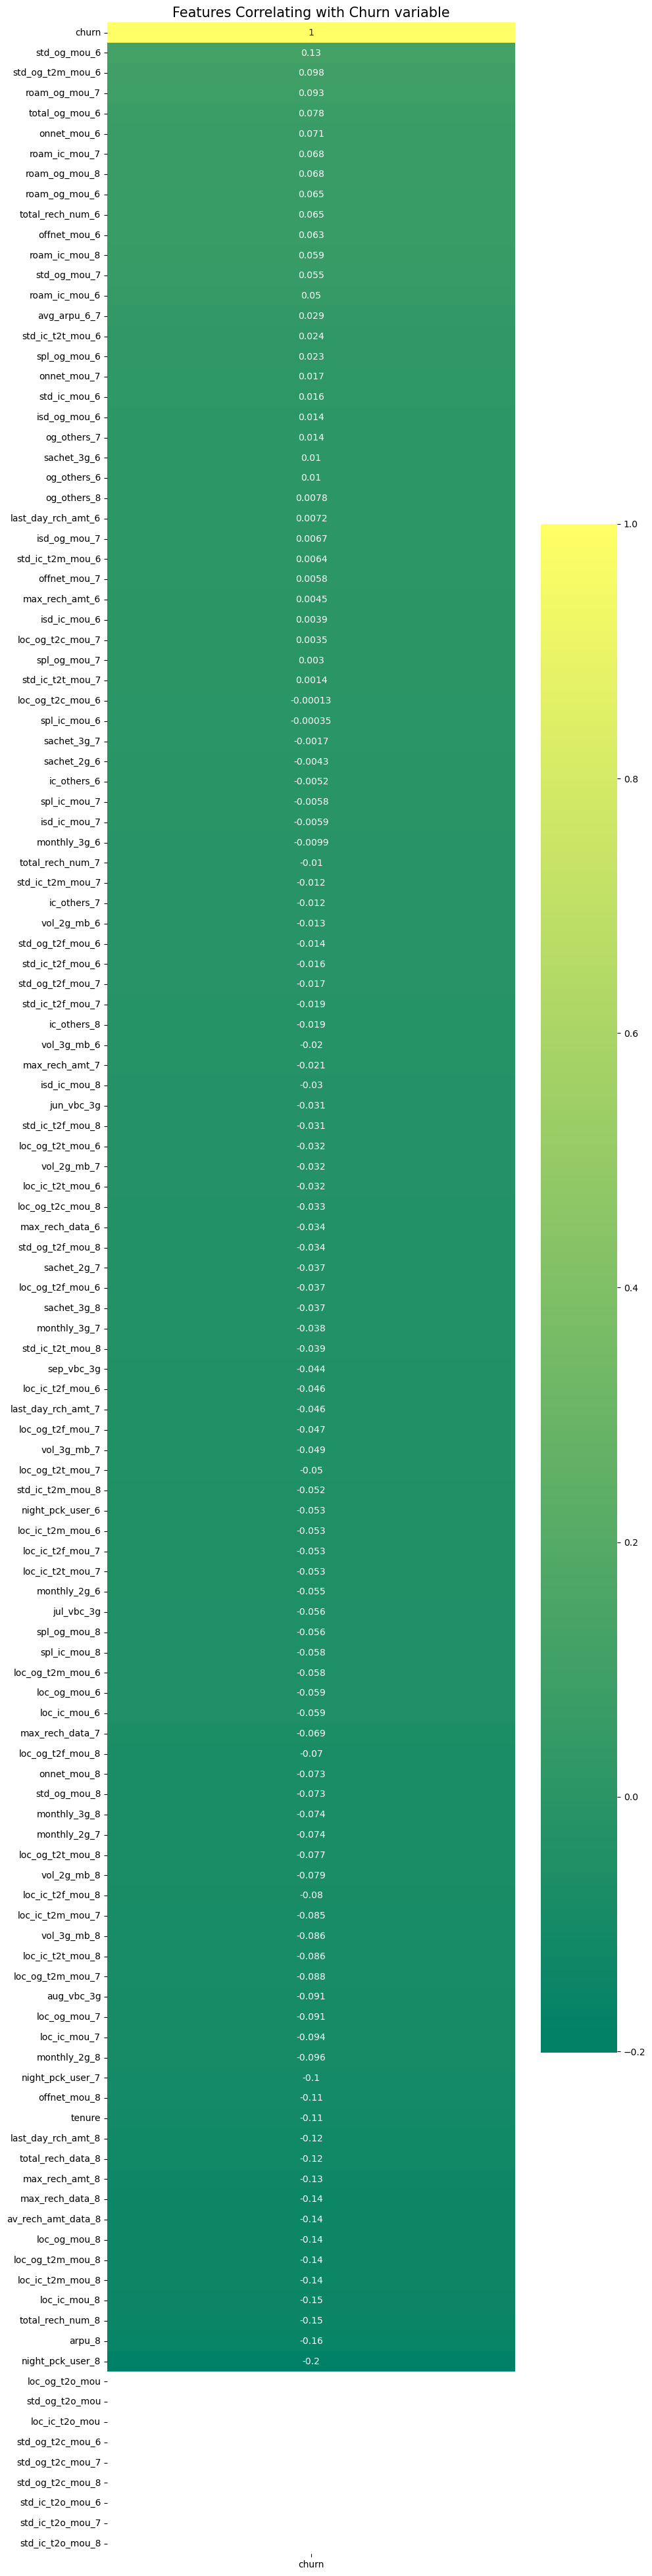

In [62]:
# Checking Correlation between target variable(SalePrice) with the other variable in the dataset
plt.figure(figsize=(10,50))
heatmap_churn = sns.heatmap(telecom_df_filtered.corr()[['churn']].sort_values(ascending=False, by='churn'),annot=True, 
                                cmap='summer')
heatmap_churn.set_title("Features Correlating with Churn variable", fontsize=15)

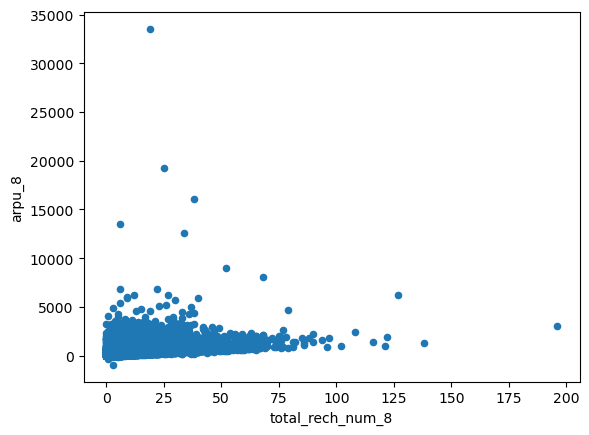

In [63]:
# lets now draw a scatter plot between total recharge and avg revenue for the 8th month
telecom_df_filtered[['total_rech_num_8', 'arpu_8']].plot.scatter(x = 'total_rech_num_8',
                                                              y='arpu_8')
plt.show()

In [64]:
# Creating categories for month 8 column totalrecharge and their count
telecom_df_filtered['total_rech_data_group_8']=pd.cut(telecom_df_filtered['total_rech_data_8'],[-1,0,10,25,100],labels=["No_Recharge","<=10_Recharges","10-25_Recharges",">25_Recharges"])
telecom_df_filtered['total_rech_num_group_8']=pd.cut(telecom_df_filtered['total_rech_num_8'],[-1,0,10,25,1000],labels=["No_Recharge","<=10_Recharges","10-25_Recharges",">25_Recharges"])

					Distribution of total_rech_data_8 variable
 <=10_Recharges     15307
No_Recharge        14048
10-25_Recharges      608
>25_Recharges         38
Name: total_rech_data_group_8, dtype: int64


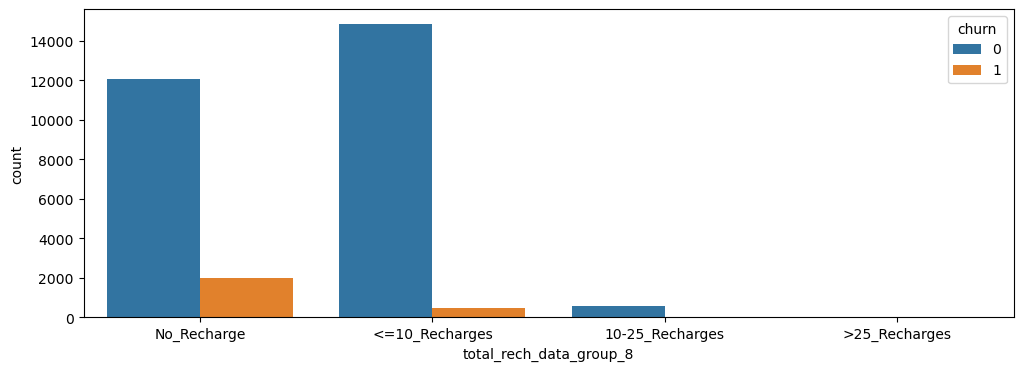

					Distribution of total_rech_num_8 variable
 <=10_Recharges     19349
10-25_Recharges     8245
>25_Recharges       1824
No_Recharge          583
Name: total_rech_num_group_8, dtype: int64


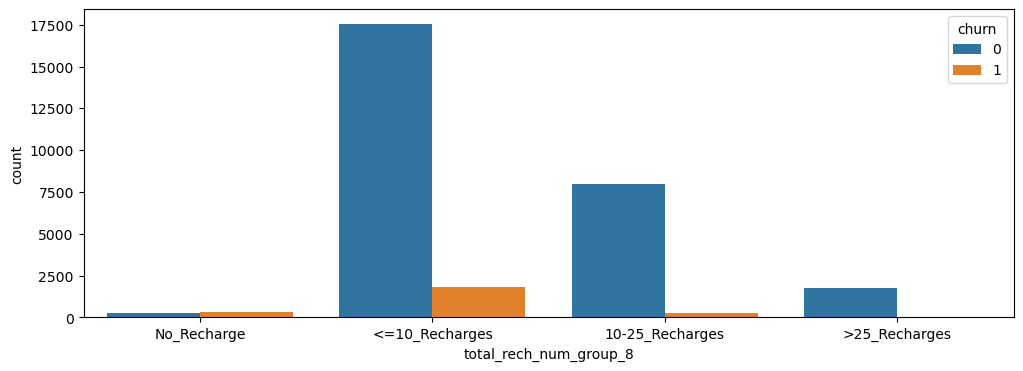

In [65]:
# Plotting the results

plt.figure(figsize=[12,4])
sns.countplot(data=telecom_df_filtered,x="total_rech_data_group_8",hue="churn")
print("\t\t\t\t\tDistribution of total_rech_data_8 variable\n",telecom_df_filtered['total_rech_data_group_8'].value_counts())
plt.show()
plt.figure(figsize=[12,4])
sns.countplot(data=telecom_df_filtered,x="total_rech_num_group_8",hue="churn")
print("\t\t\t\t\tDistribution of total_rech_num_8 variable\n",telecom_df_filtered['total_rech_num_group_8'].value_counts())
plt.show()

In [66]:
telecom_df_filtered.drop(['av_rech_amt_data_8','total_rech_data_8','sachet_2g_6','sachet_2g_7','sachet_3g_6',
              'sachet_3g_7','sachet_3g_8','last_day_rch_amt_6','last_day_rch_amt_7',
              'last_day_rch_amt_8',], axis=1, inplace=True)

In [67]:
telecom_df_filtered.drop(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou','roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 
         'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8',
         'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8',
         'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 
         'std_og_t2m_mou_6', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7',
         'std_og_t2c_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'spl_og_mou_6',
         'spl_og_mou_7', 'spl_og_mou_8','total_og_mou_6', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8', 
         'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8',
         'loc_ic_mou_6', 'loc_ic_mou_7', 'loc_ic_mou_8', 'std_ic_t2t_mou_6', 'std_ic_t2t_mou_7', 'std_ic_t2t_mou_8', 
         'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7', 'std_ic_t2m_mou_8', 'std_ic_t2f_mou_6', 'std_ic_t2f_mou_7', 'std_ic_t2f_mou_8',
         'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8', 'std_ic_mou_6', 'spl_ic_mou_6', 'spl_ic_mou_7',
         'spl_ic_mou_8', 'isd_ic_mou_6', 'isd_ic_mou_7', 'isd_ic_mou_8',], axis=1, inplace=True)

In [68]:
telecom_df_filtered.shape

(30001, 47)

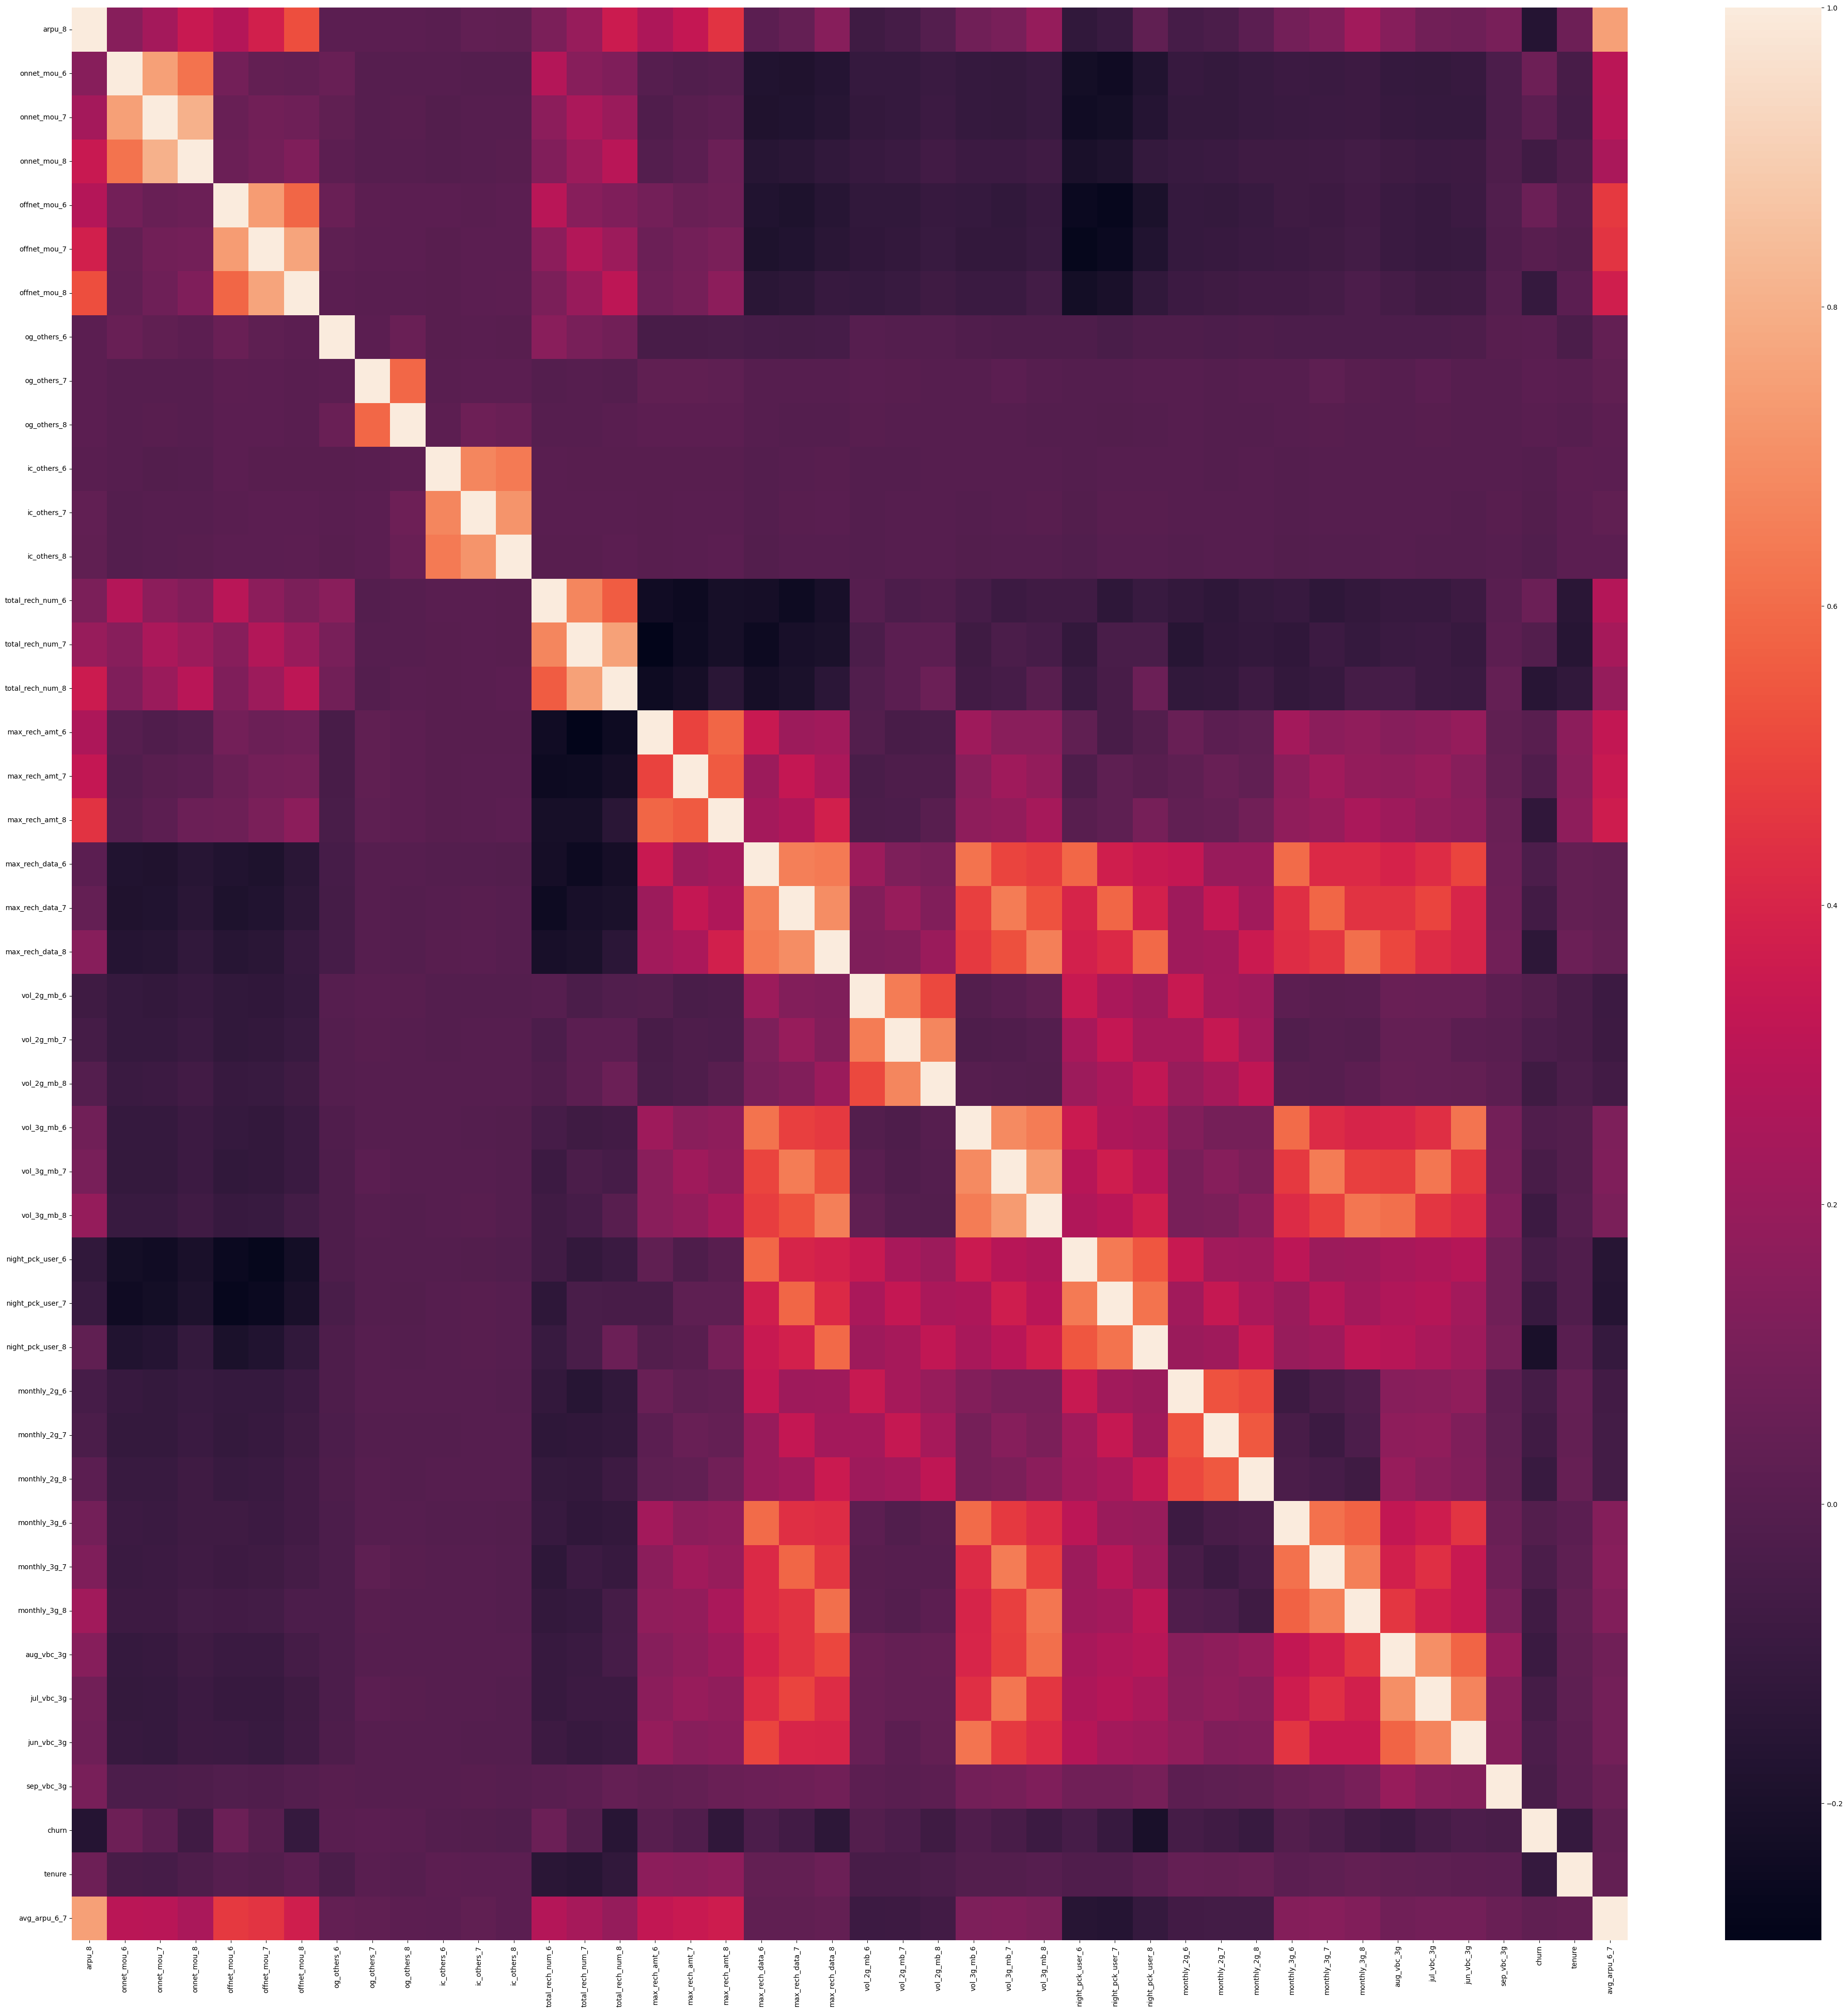

In [101]:
plt.figure(figsize = (50, 50))
sns.heatmap(telecom_df_filtered.corr())
plt.show()

In [69]:
telecom_df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 47 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   arpu_8                   30001 non-null  float64 
 1   onnet_mou_6              30001 non-null  float64 
 2   onnet_mou_7              30001 non-null  float64 
 3   onnet_mou_8              30001 non-null  float64 
 4   offnet_mou_6             30001 non-null  float64 
 5   offnet_mou_7             30001 non-null  float64 
 6   offnet_mou_8             30001 non-null  float64 
 7   og_others_6              30001 non-null  float64 
 8   og_others_7              30001 non-null  float64 
 9   og_others_8              30001 non-null  float64 
 10  ic_others_6              30001 non-null  float64 
 11  ic_others_7              30001 non-null  float64 
 12  ic_others_8              30001 non-null  float64 
 13  total_rech_num_6         30001 non-null  int64   
 14  total_

In [70]:
telecom_df_filtered.drop(['total_rech_data_group_8','total_rech_num_group_8',] , axis=1, inplace=True)


In [71]:
telecom_df_filtered.shape

(30001, 45)

In [72]:
telecom_df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 45 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   arpu_8            30001 non-null  float64 
 1   onnet_mou_6       30001 non-null  float64 
 2   onnet_mou_7       30001 non-null  float64 
 3   onnet_mou_8       30001 non-null  float64 
 4   offnet_mou_6      30001 non-null  float64 
 5   offnet_mou_7      30001 non-null  float64 
 6   offnet_mou_8      30001 non-null  float64 
 7   og_others_6       30001 non-null  float64 
 8   og_others_7       30001 non-null  float64 
 9   og_others_8       30001 non-null  float64 
 10  ic_others_6       30001 non-null  float64 
 11  ic_others_7       30001 non-null  float64 
 12  ic_others_8       30001 non-null  float64 
 13  total_rech_num_6  30001 non-null  int64   
 14  total_rech_num_7  30001 non-null  int64   
 15  total_rech_num_8  30001 non-null  int64   
 16  max_rech_amt_6    3000

In [73]:
telecom_df_filtered.drop(['tenure_range'] , axis=1, inplace=True)

In [107]:
telecom_df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 44 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   arpu_8            30001 non-null  float64
 1   onnet_mou_6       30001 non-null  float64
 2   onnet_mou_7       30001 non-null  float64
 3   onnet_mou_8       30001 non-null  float64
 4   offnet_mou_6      30001 non-null  float64
 5   offnet_mou_7      30001 non-null  float64
 6   offnet_mou_8      30001 non-null  float64
 7   og_others_6       30001 non-null  float64
 8   og_others_7       30001 non-null  float64
 9   og_others_8       30001 non-null  float64
 10  ic_others_6       30001 non-null  float64
 11  ic_others_7       30001 non-null  float64
 12  ic_others_8       30001 non-null  float64
 13  total_rech_num_6  30001 non-null  int64  
 14  total_rech_num_7  30001 non-null  int64  
 15  total_rech_num_8  30001 non-null  int64  
 16  max_rech_amt_6    30001 non-null  int64 

In [75]:
churn_rate = (sum(telecom_df_filtered["churn"])/len(telecom_df_filtered["churn"].index))*100
churn_rate


8.136395453484884

# Split Data Into Train and Test Data

In [82]:
telecom_df_filtered.shape

(30001, 44)

In [84]:
# import required libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from imblearn.metrics import sensitivity_specificity_support
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

In [85]:
# divide data into train and test
X = telecom_df_filtered.drop("churn", axis = 1)
y = telecom_df_filtered.churn
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 4, stratify = y)

In [86]:
# print shapes of train and test sets
X_train.shape

(22500, 43)

In [87]:
y_train.shape

(22500,)

In [88]:
X_test.shape

(7501, 43)

In [89]:
y_test.shape

(7501,)

# Performe Scaling

In [90]:
X_train.head()

,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,og_others_6,og_others_7,og_others_8,...,monthly_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,tenure,avg_arpu_6_7
4525,183.004,3.93,0.00,0.00,4.09,0.16,15.46,0.00,0.0,0.0,...,1,0,0,0,0.00,0.00,0.0,0.0,20.0,111.4590
12436,62.260,5.44,11.20,0.00,39.46,11.64,37.74,0.00,0.0,0.0,...,0,2,2,2,955.97,1613.36,735.4,0.0,11.0,93.4050
29024,24.750,725.11,671.44,11.76,145.63,80.66,2.50,2.33,0.0,0.0,...,0,0,0,0,0.00,0.00,0.0,0.0,10.0,523.5985
11193,422.360,17.93,37.53,23.89,526.68,831.58,671.01,0.00,0.0,0.0,...,0,0,0,0,0.00,0.00,0.0,0.0,28.0,487.7310
10907,2300.151,7.53,11.88,56.49,788.53,1441.28,5453.33,0.98,0.0,0.0,...,0,0,0,0,0.00,0.00,0.0,0.0,81.0,497.1310


In [91]:
X_train.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 22500 entries, 4525 to 22754
Data columns (total 43 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   arpu_8            22500 non-null  float64
 1   onnet_mou_6       22500 non-null  float64
 2   onnet_mou_7       22500 non-null  float64
 3   onnet_mou_8       22500 non-null  float64
 4   offnet_mou_6      22500 non-null  float64
 5   offnet_mou_7      22500 non-null  float64
 6   offnet_mou_8      22500 non-null  float64
 7   og_others_6       22500 non-null  float64
 8   og_others_7       22500 non-null  float64
 9   og_others_8       22500 non-null  float64
 10  ic_others_6       22500 non-null  float64
 11  ic_others_7       22500 non-null  float64
 12  ic_others_8       22500 non-null  float64
 13  total_rech_num_6  22500 non-null  int64  
 14  total_rech_num_7  22500 non-null  int64  
 15  total_rech_num_8  22500 non-null  int64  
 16  max_rech_amt_6    22500 non-null  int

In [92]:
num_col = X_train.select_dtypes(include = ['int64','float64']).columns.tolist()

In [93]:
# apply scaling on the dataset
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train[num_col] = scaler.fit_transform(X_train[num_col])

In [94]:
X_train.head()

,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,og_others_6,og_others_7,og_others_8,...,monthly_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,tenure,avg_arpu_6_7
4525,0.032729,0.000561,0.000000,0.000000,0.000587,0.000017,0.001104,0.000000,0.0,0.0,...,0.2,0.000000,0.000,0.000,0.000000,0.000000,0.000000,0.0,0.101449,0.026756
12436,0.029228,0.000776,0.001511,0.000000,0.005668,0.001204,0.002694,0.000000,0.0,0.0,...,0.0,0.142857,0.125,0.125,0.074013,0.176023,0.065859,0.0,0.036232,0.026196
29024,0.028141,0.103423,0.090600,0.001639,0.020916,0.008344,0.000178,0.033045,0.0,0.0,...,0.0,0.000000,0.000,0.000,0.000000,0.000000,0.000000,0.0,0.028986,0.039560
11193,0.039669,0.002557,0.005064,0.003330,0.075646,0.086021,0.047904,0.000000,0.0,0.0,...,0.0,0.000000,0.000,0.000,0.000000,0.000000,0.000000,0.0,0.159420,0.038446
10907,0.094115,0.001074,0.001603,0.007874,0.113255,0.149091,0.389319,0.013899,0.0,0.0,...,0.0,0.000000,0.000,0.000,0.000000,0.000000,0.000000,0.0,0.543478,0.038738


In [95]:
!pip install imbalanced-learn

Defaulting to user installation because normal site-packages is not writeable


In [96]:
from imblearn.over_sampling import SMOTE

# Data Modeling and Model Evaluation

In [97]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train_sm,y_train_sm = sm.fit_resample(X_train,y_train)

In [98]:
print("Dimension of X_train_sm Shape:", X_train_sm.shape)
print("Dimension of y_train_sm Shape:", y_train_sm.shape)

Dimension of X_train_sm Shape: (41338, 43)
Dimension of y_train_sm Shape: (41338,)


# Logistic Regression

In [99]:
# Importing necessary libraries for Model creation
import statsmodels.api as sm

In [100]:
# Logistic regression model
logm1 = sm.GLM(y_train_sm,(sm.add_constant(X_train_sm)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                41338
Model:                            GLM   Df Residuals:                    41294
Model Family:                Binomial   Df Model:                           43
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 04 Dec 2023   Deviance:                       38351.
Time:                        17:36:51   Pearson chi2:                 5.59e+08
No. Iterations:                    14   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                1.1909      0.067     17.730      0.000       1.059       1.322
arpu_8             -21.3748      3.015     -7.089      0.000     -27.284     -15.466
onnet_mou_6          1.3007      0.348      3.743      0.000       0.620       1.982
onnet_mou_7          2.3250      0.483      4.817      0.000       1.379       3.271
onnet_mou_8         -5.8496      0.532    -11.000      0.000      -6.892      -4.807
offnet_mou_6         0.9268      0.345      2.686      0.007       0.250       1.603
offnet_mou_7         5.6821      0.622      9.136      0.000       4.463       6.901
offnet_mou_8       -27.1913      1.228    -22.137      0.000     -29.599     -24.784
og_others_6         -3.4394      0.514     -6.695      0.000      -4.446      -2.432
og_others_7         -2.9676      5.183     -0.573      0.567     -13.127       7.192
og_others_8      -1863.8168    865.382     -2.154      0.031   -3559.934    -167.700
ic_others_6        -15.9516      4.851     -3.288      0.001     -25.460      -6.443
ic_others_7          1.9219      2.608      0.737      0.461      -3.190       7.034
ic_others_8        -27.3391      4.769     -5.732      0.000     -36.686     -17.992
total_rech_num_6     5.0031      0.781      6.408      0.000       3.473       6.533
total_rech_num_7     4.1948      0.422      9.943      0.000       3.368       5.022
total_rech_num_8   -20.2576      0.746    -27.156      0.000     -21.720     -18.796
max_rech_amt_6       0.8949      0.425      2.104      0.035       0.061       1.729
max_rech_amt_7       2.0053      0.368      5.456      0.000       1.285       2.726
max_rech_amt_8      -4.7172      0.576     -8.191      0.000      -5.846      -3.588
max_rech_data_6      0.3423      0.381      0.897      0.370      -0.405       1.090
max_rech_data_7      2.6352      0.413      6.378      0.000       1.825       3.445
max_rech_data_8     -0.7441      0.515     -1.446      0.148      -1.753       0.264
vol_2g_mb_6          1.9037      0.657      2.898      0.004       0.616       3.191
vol_2g_mb_7          4.1075      0.595      6.899      0.000       2.940       5.274
vol_2g_mb_8        -13.8426      1.249    -11.084      0.000     -16.290     -11.395
vol_3g_mb_6          4.9272      1.497      3.292      0.001       1.994       7.860
vol_3g_mb_7          1.4755      1.110      1.329      0.184      -0.701       3.652
vol_3g_mb_8         -6.7477      1.365     -4.942      0.000      -9.424      -4.072
night_pck_user_6     0.2427      0.084      2.887      0.004       0.078       0.407
night_pck_user_7    -0.5403      0.089     -6.102      0.000      -0.714      -0.367
night_pck_user_8    -1.5041      0.085    -17.604      0.000      -1.672      -1.337
monthly_2g_6        -1.0121      0.188     -5.394      0.000      -1.380      -0.644
monthly_2g_7        -2.

# Logistic Regression using Feature Selection (RFE method)


In [101]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE

# running RFE with 20 variables as output
rfe = RFE(logreg,  n_features_to_select= 20)             
rfe = rfe.fit(X_train_sm, y_train_sm)

In [102]:
rfe.support_

array([ True,  True,  True,  True, False,  True,  True,  True, False,
       False, False, False,  True,  True,  True,  True, False, False,
        True, False, False, False, False, False,  True, False, False,
       False, False, False, False, False,  True,  True,  True, False,
        True,  True, False, False,  True, False,  True])

In [103]:
rfe_columns=X_train_sm.columns[rfe.support_]
print("The selected columns by RFE for modelling are: \n\n",rfe_columns)

The selected columns by RFE for modelling are: 

 Index(['arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_7',
       'offnet_mou_8', 'og_others_6', 'ic_others_8', 'total_rech_num_6',
       'total_rech_num_7', 'total_rech_num_8', 'max_rech_amt_8', 'vol_2g_mb_8',
       'monthly_2g_7', 'monthly_2g_8', 'monthly_3g_6', 'monthly_3g_8',
       'aug_vbc_3g', 'sep_vbc_3g', 'avg_arpu_6_7'],
      dtype='object')


In [104]:
list(zip(X_train_sm.columns, rfe.support_, rfe.ranking_))

[('arpu_8', True, 1),
 ('onnet_mou_6', True, 1),
 ('onnet_mou_7', True, 1),
 ('onnet_mou_8', True, 1),
 ('offnet_mou_6', False, 8),
 ('offnet_mou_7', True, 1),
 ('offnet_mou_8', True, 1),
 ('og_others_6', True, 1),
 ('og_others_7', False, 19),
 ('og_others_8', False, 20),
 ('ic_others_6', False, 12),
 ('ic_others_7', False, 14),
 ('ic_others_8', True, 1),
 ('total_rech_num_6', True, 1),
 ('total_rech_num_7', True, 1),
 ('total_rech_num_8', True, 1),
 ('max_rech_amt_6', False, 11),
 ('max_rech_amt_7', False, 5),
 ('max_rech_amt_8', True, 1),
 ('max_rech_data_6', False, 15),
 ('max_rech_data_7', False, 10),
 ('max_rech_data_8', False, 18),
 ('vol_2g_mb_6', False, 13),
 ('vol_2g_mb_7', False, 3),
 ('vol_2g_mb_8', True, 1),
 ('vol_3g_mb_6', False, 2),
 ('vol_3g_mb_7', False, 17),
 ('vol_3g_mb_8', False, 6),
 ('night_pck_user_6', False, 22),
 ('night_pck_user_7', False, 21),
 ('night_pck_user_8', False, 4),
 ('monthly_2g_6', False, 16),
 ('monthly_2g_7', True, 1),
 ('monthly_2g_8', True, 1)

# Assessing the model with StatsModels

In [105]:
X_train_SM = sm.add_constant(X_train_sm[rfe_columns])
logm2 = sm.GLM(y_train_sm,X_train_SM, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                41338
Model:                            GLM   Df Residuals:                    41317
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -20140.
Date:                Mon, 04 Dec 2023   Deviance:                       40279.
Time:                        17:38:29   Pearson chi2:                 1.38e+10
No. Iterations:                     8   Pseudo R-squ. (CS):             0.3376
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.6607      0.059     11.135      0.000       0.544       0.777
arpu_8             -30.2547      2.837    -10.666      0.000     -35.814     -24.695
onnet_mou_6          0.8666      0.331      2.619      0.009       0.218       1.515
onnet_mou_7          1.9986      0.464      4.312      0.000       1.090       2.907
onnet_mou_8         -4.5567      0.515     -8.849      0.000      -5.566      -3.547
offnet_mou_7         5.9223      0.534     11.088      0.000       4.875       6.969
offnet_mou_8       -26.0690      1.200    -21.722      0.000     -28.421     -23.717
og_others_6         -2.8223      0.496     -5.691      0.000      -3.794      -1.850
ic_others_8        -30.8994      4.611     -6.701      0.000     -39.937     -21.861
total_rech_num_6     7.0009      0.688     10.169      0.000       5.652       8.350
total_rech_num_7     4.0281      0.373     10.785      0.000       3.296       4.760
total_rech_num_8   -23.5592      0.719    -32.772      0.000     -24.968     -22.150
max_rech_amt_8      -5.1385      0.506    -10.158      0.000      -6.130      -4.147
vol_2g_mb_8        -15.1002      1.075    -14.042      0.000     -17.208     -12.993
monthly_2g_7        -1.5811      0.201     -7.861      0.000      -1.975      -1.187
monthly_2g_8        -5.9794      0.323    -18.485      0.000      -6.613      -5.345
monthly_3g_6         2.6790      0.403      6.640      0.000       1.888       3.470
monthly_3g_8        -7.7425      0.668    -11.596      0.000      -9.051      -6.434
aug_vbc_3g         -11.2160      0.876    -12.805      0.000     -12.933      -9.499
sep_vbc_3g         -53.1497      4.147    -12.817      0.000     -61.277     -45.022
avg_arpu_6_7        37.2017      2.318     16.047      0.000      32.658      41.746
====================================================================================
"""

In [106]:
# Getting the predicted values on the train set
y_train_sm_pred = res.predict(X_train_SM)
y_train_sm_pred = y_train_sm_pred.values.reshape(-1)
y_train_sm_pred[:10]

array([7.01362043e-03, 2.17792738e-01, 8.36945529e-01, 1.79447456e-01,
       1.79098640e-06, 2.92299523e-01, 8.11385460e-02, 6.75277336e-06,
       5.86271063e-01, 1.84647613e-01])

In [107]:
y_train_sm_pred_final = pd.DataFrame({'Converted':y_train_sm.values, 'Converted_prob':y_train_sm_pred})
y_train_sm_pred_final.head()

,Converted,Converted_prob
0,0,0.007014
1,0,0.217793
2,1,0.836946
3,0,0.179447
4,0,0.000002


# Creating new column 'churn_pred

In [108]:
y_train_sm_pred_final['churn_pred'] = y_train_sm_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Viewing the prediction results
y_train_sm_pred_final.head()

,Converted,Converted_prob,churn_pred
0,0,0.007014,0
1,0,0.217793,0
2,1,0.836946,1
3,0,0.179447,0
4,0,0.000002,0


In [109]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_sm_pred_final.Converted, y_train_sm_pred_final.churn_pred )
print(confusion)

[[15846  4823]
 [ 3950 16719]]


In [110]:
# Checking the overall accuracy.
print("The overall accuracy of the model is:",metrics.accuracy_score(y_train_sm_pred_final.Converted, y_train_sm_pred_final.churn_pred))

The overall accuracy of the model is: 0.7877739610044028


# Check for the VIF values

In [111]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [112]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_sm[rfe_columns].columns
vif['VIF'] = [variance_inflation_factor(X_train_sm[rfe_columns].values, i) for i in range(X_train_sm[rfe_columns].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,arpu_8,38.86
19,avg_arpu_6_7,37.60
9,total_rech_num_7,7.43
8,total_rech_num_6,5.70
2,onnet_mou_7,5.38
10,total_rech_num_8,5.31
4,offnet_mou_7,4.24
5,offnet_mou_8,3.97
1,onnet_mou_6,3.68
3,onnet_mou_8,3.45


In [113]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [114]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity = ",TP / float(TP+FN))

# Let us calculate specificity
print("Specificity = ",TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print("False Positive Rate = ",FP/ float(TN+FP))

# positive predictive value 
print ("Precision = ",TP / float(TP+FP))

# Negative predictive value
print ("True Negative Prediction Rate = ",TN / float(TN+ FN))

Sensitivity =  0.8088925443901495
Specificity =  0.766655377618656
False Positive Rate =  0.23334462238134404
Precision =  0.7761117816358741
True Negative Prediction Rate =  0.8004647403515862


# Plotting the ROC Curve

In [115]:
# Defining a function to plot the roc curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Prediction Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [116]:
# Defining the variables to plot the curve
fpr, tpr, thresholds = metrics.roc_curve( y_train_sm_pred_final.Converted, y_train_sm_pred_final.Converted_prob, drop_intermediate = False )

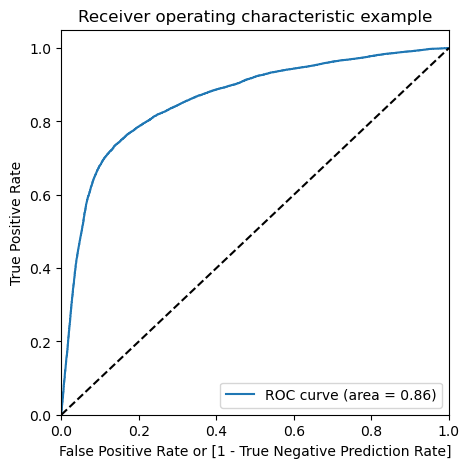

In [117]:
# Plotting the curve for the obtained metrics
draw_roc(y_train_sm_pred_final.Converted, y_train_sm_pred_final.Converted_prob)

In [118]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_sm_pred_final[i]= y_train_sm_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_sm_pred_final.head()

,Converted,Converted_prob,churn_pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.007014,0,1,0,0,0,0,0,0,0,0,0
1,0,0.217793,0,1,1,1,0,0,0,0,0,0,0
2,1,0.836946,1,1,1,1,1,1,1,1,1,1,0
3,0,0.179447,0,1,1,0,0,0,0,0,0,0,0
4,0,0.000002,0,1,0,0,0,0,0,0,0,0,0


In [119]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_sm_pred_final.Converted, y_train_sm_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(cutoff_df)

     probability  accuracy  sensitivity  specificity
0.0          0.0  0.500000     1.000000     0.000000
0.1          0.1  0.605133     0.971406     0.238860
0.2          0.2  0.668078     0.945571     0.390585
0.3          0.3  0.718806     0.913348     0.524263
0.4          0.4  0.759156     0.868595     0.649717
0.5          0.5  0.787774     0.808893     0.766655
0.6          0.6  0.797741     0.731627     0.863854
0.7          0.7  0.769752     0.614447     0.925057
0.8          0.8  0.674416     0.383231     0.965601
0.9          0.9  0.558348     0.127389     0.989308


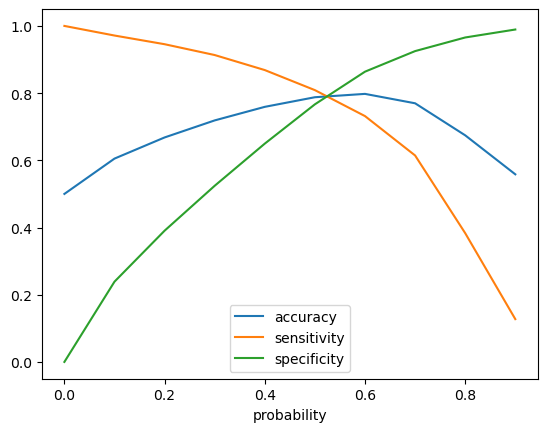

In [120]:
# plotting accuracy sensitivity and specificity for various probabilities calculated above.
cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity'])
plt.show()

Initially we selected the optimm point of classification as 0.5.


In [121]:
# Let's create columns with refined probability cutoffs 
numbers = [0.50,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59]
for i in numbers:
    y_train_sm_pred_final[i]= y_train_sm_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_sm_pred_final.head()

,Converted,Converted_prob,churn_pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,...,0.9,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59
0,0,0.007014,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0.217793,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0.836946,1,1,1,1,1,1,1,1,...,0,1,1,1,1,1,1,1,1,1
3,0,0.179447,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0.000002,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [122]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.50,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_sm_pred_final.Converted, y_train_sm_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(cutoff_df)

      probability  accuracy  sensitivity  specificity
0.50         0.50  0.787774     0.808893     0.766655
0.51         0.51  0.789153     0.801055     0.777251
0.52         0.52  0.791620     0.794185     0.789056
0.53         0.53  0.793144     0.786685     0.799603
0.54         0.54  0.794233     0.779864     0.808602
0.55         0.55  0.795467     0.772655     0.818279
0.56         0.56  0.796846     0.764914     0.828777
0.57         0.57  0.797039     0.756108     0.837970
0.58         0.58  0.797426     0.748174     0.846679
0.59         0.59  0.797595     0.739755     0.855436


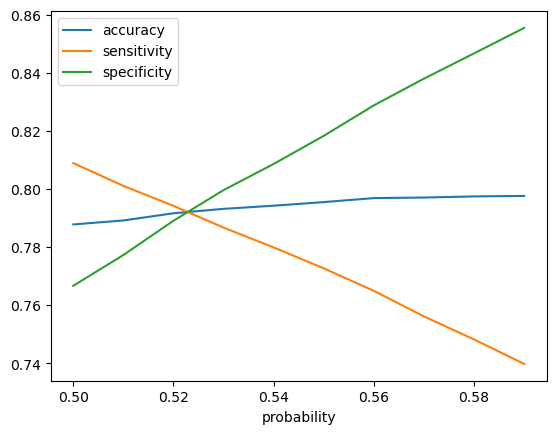

In [123]:
# plotting accuracy sensitivity and specificity for various probabilities calculated above.
cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity'])
plt.show()

In [124]:
#### From the curve above,we can take 0.53 is the optimum point to take it as a cutoff probability.

y_train_sm_pred_final['final_churn_pred'] = y_train_sm_pred_final.Converted_prob.map( lambda x: 1 if x > 0.53 else 0)

y_train_sm_pred_final.head()

,Converted,Converted_prob,churn_pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,...,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59,final_churn_pred
0,0,0.007014,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0.217793,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0.836946,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
3,0,0.179447,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0.000002,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [125]:
# Calculating the ovearall accuracy again
print("The overall accuracy of the model now is:",metrics.accuracy_score(y_train_sm_pred_final.Converted, y_train_sm_pred_final.final_churn_pred))

The overall accuracy of the model now is: 0.7931443224152112


In [126]:
confusion2 = metrics.confusion_matrix(y_train_sm_pred_final.Converted, y_train_sm_pred_final.final_churn_pred )
print(confusion2)

[[16527  4142]
 [ 4409 16260]]


In [127]:
TP2 = confusion2[1,1] # true positive 
TN2 = confusion2[0,0] # true negatives
FP2 = confusion2[0,1] # false positives
FN2 = confusion2[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print("Sensitivity = ",TP2 / float(TP2+FN2))

# Let us calculate specificity
print("Specificity = ",TN2 / float(TN2+FP2))

# Calculate false postive rate - predicting churn when customer does not have churned
print("False Positive Rate = ",FP2/ float(TN2+FP2))

# positive predictive value 
print ("Precision = ",TP2 / float(TP2+FP2))

# Negative predictive value
print ("True Negative Prediction Rate = ",TN2 / float(TN2 + FN2))

Sensitivity =  0.7866853742319415
Specificity =  0.7996032705984808
False Positive Rate =  0.20039672940151917
Precision =  0.7969806881678266
True Negative Prediction Rate =  0.7894058081773022


In [128]:
from sklearn.metrics import precision_recall_curve

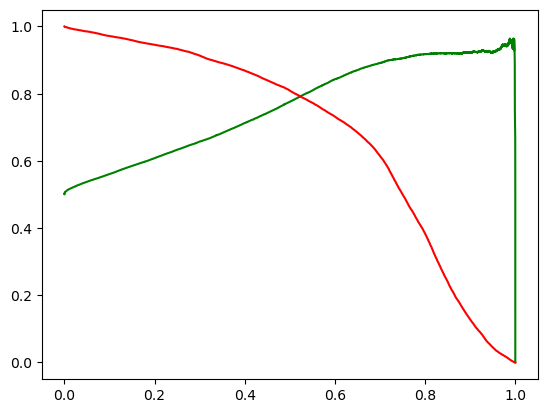

In [129]:
p, r, thresholds = precision_recall_curve(y_train_sm_pred_final.Converted, y_train_sm_pred_final.Converted_prob)

# Plotting the curve
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

Making predictions on the test set

In [130]:
# Scaling the test data
X_test[num_col] = scaler.transform(X_test[num_col])
X_test.head()

,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,og_others_6,og_others_7,og_others_8,...,monthly_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,tenure,avg_arpu_6_7
16575,0.046455,0.000000,0.001074,0.000000,0.000000,0.011408,0.000000,0.000000,0.0,0.0,...,0.0,0.428571,0.3750,0.1875,0.160223,0.217613,0.412013,0.000000,0.094203,0.049051
10086,0.044771,0.075774,0.067489,0.068323,0.009290,0.007710,0.005207,0.000000,0.0,0.0,...,0.0,0.000000,0.0000,0.0000,0.000000,0.000000,0.000000,0.000000,0.268116,0.035274
18646,0.042529,0.136566,0.114743,0.149345,0.001090,0.002716,0.001079,0.000000,0.0,0.0,...,0.0,0.000000,0.0000,0.0000,0.000000,0.000000,0.000181,0.000000,0.565217,0.034930
10925,0.027401,0.000000,0.000000,0.000367,0.001958,0.000000,0.000843,0.000000,0.0,0.0,...,0.0,0.214286,0.0625,0.0000,0.000000,0.000000,0.092829,0.000000,0.036232,0.033257
24503,0.044181,0.000548,0.013906,0.014724,0.113417,0.107065,0.052672,0.087789,0.0,0.0,...,0.0,0.000000,0.0000,0.0000,0.000000,0.000000,0.000000,0.069046,0.224638,0.041169


In [131]:
# Feature selection
X_test=X_test[rfe_columns]
X_test.head()

,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_7,offnet_mou_8,og_others_6,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_8,vol_2g_mb_8,monthly_2g_7,monthly_2g_8,monthly_3g_6,monthly_3g_8,aug_vbc_3g,sep_vbc_3g,avg_arpu_6_7
16575,0.046455,0.000000,0.001074,0.000000,0.011408,0.000000,0.000000,0.0,0.022801,0.072464,0.015306,0.056642,0.002816,0.0,0.0,0.428571,0.1875,0.160223,0.000000,0.049051
10086,0.044771,0.075774,0.067489,0.068323,0.007710,0.005207,0.000000,0.0,0.013029,0.014493,0.015306,0.089908,0.000000,0.0,0.0,0.000000,0.0000,0.000000,0.000000,0.035274
18646,0.042529,0.136566,0.114743,0.149345,0.002716,0.001079,0.000000,0.0,0.016287,0.036232,0.025510,0.112385,0.000000,0.0,0.0,0.000000,0.0000,0.000000,0.000000,0.034930
10925,0.027401,0.000000,0.000000,0.000367,0.000000,0.000843,0.000000,0.0,0.016287,0.028986,0.010204,0.000000,0.000000,0.0,0.0,0.214286,0.0000,0.000000,0.000000,0.033257
24503,0.044181,0.000548,0.013906,0.014724,0.107065,0.052672,0.087789,0.0,0.052117,0.173913,0.091837,0.009890,0.000000,0.0,0.0,0.000000,0.0000,0.000000,0.069046,0.041169


In [132]:
# Adding constant to the test model.
X_test_SM = sm.add_constant(X_test)

Predicting the target variable

In [133]:
y_test_pred = res.predict(X_test_SM)
print("\n The first ten probability value of the prediction are:\n",y_test_pred[:10])


 The first ten probability value of the prediction are:
 16575    0.232613
10086    0.436469
18646    0.356630
10925    0.833367
24503    0.006767
10584    0.233125
2654     0.203539
23565    0.763606
5876     0.375729
19698    0.014449
dtype: float64


In [134]:
y_pred = pd.DataFrame(y_test_pred)
y_pred.head()

,0
16575,0.232613
10086,0.436469
18646,0.356630
10925,0.833367
24503,0.006767


In [135]:
y_pred=y_pred.rename(columns = {0:"Conv_prob"})

In [136]:
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,churn
16575,0
10086,0
18646,0
10925,1
24503,0


In [137]:
y_pred_final = pd.concat([y_test_df,y_pred],axis=1)
y_pred_final.head()

,churn,Conv_prob
16575,0,0.232613
10086,0,0.436469
18646,0,0.356630
10925,1,0.833367
24503,0,0.006767


In [138]:
y_pred_final['test_churn_pred'] = y_pred_final.Conv_prob.map(lambda x: 1 if x>0.54 else 0)
y_pred_final.head()

,churn,Conv_prob,test_churn_pred
16575,0,0.232613,0
10086,0,0.436469,0
18646,0,0.356630,0
10925,1,0.833367,1
24503,0,0.006767,0


In [139]:
# Checking the overall accuracy of the predicted set.
metrics.accuracy_score(y_pred_final.churn, y_pred_final.test_churn_pred)

0.8073590187974937

Metrics Evaluation

In [140]:
# Confusion Matrix
confusion2_test = metrics.confusion_matrix(y_pred_final.churn, y_pred_final.test_churn_pred)
print("Confusion Matrix\n",confusion2_test)

Confusion Matrix
 [[5589 1302]
 [ 143  467]]


In [141]:
# Calculating model validation parameters
TP3 = confusion2_test[1,1] # true positive 
TN3 = confusion2_test[0,0] # true negatives
FP3 = confusion2_test[0,1] # false positives
FN3 = confusion2_test[1,0] # false negatives

In [142]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity = ",TP3 / float(TP3+FN3))

# Let us calculate specificity
print("Specificity = ",TN3 / float(TN3+FP3))

# Calculate false postive rate - predicting churn when customer does not have churned
print("False Positive Rate = ",FP3/ float(TN3+FP3))

# positive predictive value 
print ("Precision = ",TP3 / float(TP3+FP3))

# Negative predictive value
print ("True Negative Prediction Rate = ",TN3 / float(TN3+FN3))

Sensitivity =  0.7655737704918033
Specificity =  0.8110579016107967
False Positive Rate =  0.1889420983892033
Precision =  0.2639909553420011
True Negative Prediction Rate =  0.9750523377529658


In [143]:
print("The accuracy of the predicted model is: ",round(metrics.accuracy_score(y_pred_final.churn, y_pred_final.test_churn_pred),2)*100,"%")
print("The sensitivity of the predicted model is: ",round(TP3 / float(TP3+FN3),2)*100,"%")

print("\nAs the model created is based on a sentivity model, i.e. the True positive rate is given more importance as the actual and prediction of churn by a customer\n")

The accuracy of the predicted model is:  81.0 %
The sensitivity of the predicted model is:  77.0 %

As the model created is based on a sentivity model, i.e. the True positive rate is given more importance as the actual and prediction of churn by a customer



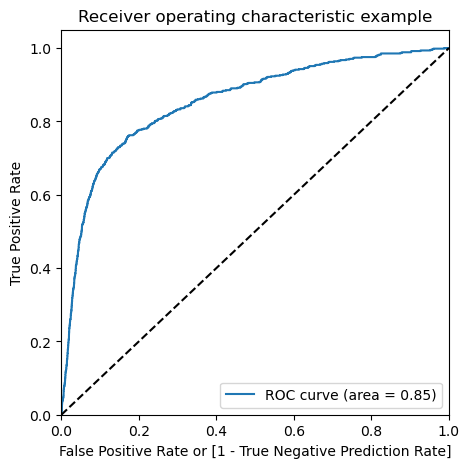

In [144]:
# ROC curve for the test dataset

# Defining the variables to plot the curve
fpr, tpr, thresholds = metrics.roc_curve(y_pred_final.churn,y_pred_final.Conv_prob, drop_intermediate = False )
# Plotting the curve for the obtained metrics
draw_roc(y_pred_final.churn,y_pred_final.Conv_prob)

# The AUC score for train dataset is 0.86 and the test dataset is 0.85

In [145]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=10)


In [146]:
X_train.shape

(24000, 43)

In [147]:
from sklearn.decomposition import PCA

In [148]:
pca = PCA(random_state=42)

In [149]:
pca.fit(X_train)

PCA(random_state=42)

In [150]:
pca.components_

array([[ 4.72029868e-02, -4.45900199e-02, -4.79398086e-02, ...,
         4.16107647e-03, -7.53971540e-05,  3.72096962e-02],
       [ 4.27156764e-01,  2.21480421e-01,  2.66437208e-01, ...,
         8.53620813e-04,  3.93561136e-04,  3.83160431e-01],
       [-2.27887707e-02,  4.67351056e-01,  5.28643300e-01, ...,
        -1.27539962e-03, -2.07145436e-03, -1.02944884e-02],
       ...,
       [ 4.92366118e-05,  6.25557356e-06, -2.83262151e-05, ...,
         2.53678280e-05, -5.88214198e-05, -4.00524309e-05],
       [ 2.39407849e-05, -1.32882224e-05,  2.51975263e-05, ...,
         5.18661703e-05,  5.21737690e-05, -1.90627697e-05],
       [ 1.73138863e-04,  2.46108654e-05,  1.81183885e-05, ...,
         1.22685675e-04, -2.12714129e-06, -1.67597411e-04]])

Analysing the explained variance ratio

In [152]:
pca.explained_variance_ratio_

array([4.23284569e-01, 1.50632979e-01, 9.41700737e-02, 6.20924527e-02,
       4.71778948e-02, 4.63575788e-02, 3.78120960e-02, 3.46933754e-02,
       2.25847992e-02, 1.36159065e-02, 1.02111554e-02, 9.45038613e-03,
       8.78227341e-03, 8.54760162e-03, 6.60256580e-03, 6.34517515e-03,
       5.59532232e-03, 3.26230811e-03, 2.85303020e-03, 2.09133734e-03,
       2.00508981e-03, 5.72578060e-04, 4.94444115e-04, 4.13760909e-04,
       1.79900641e-04, 1.05547629e-04, 2.40013181e-05, 1.50661247e-05,
       1.14591417e-05, 4.73060374e-06, 3.69307110e-06, 3.24496258e-06,
       2.61914288e-06, 7.06190381e-07, 9.65584348e-08, 5.59540455e-08,
       3.56265785e-08, 2.34316725e-08, 2.02799132e-08, 1.44779997e-08,
       1.19033188e-08, 1.03056558e-08, 9.71512076e-09])

In [153]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

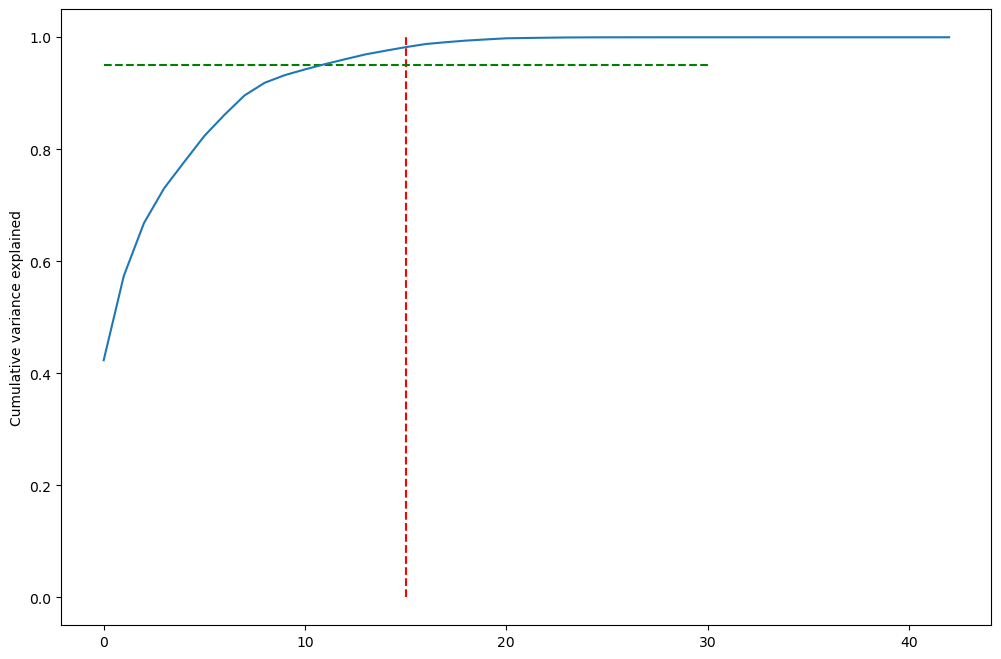

In [154]:
fig = plt.figure(figsize=[12,8])
plt.vlines(x=15, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=30, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

In [155]:
from sklearn.decomposition import IncrementalPCA

In [156]:
pca_final = IncrementalPCA(n_components=16)

In [157]:
df_train_pca = pca_final.fit_transform(X_train)

In [158]:
df_train_pca.shape

(24000, 16)

In [159]:
corrmat = np.corrcoef(df_train_pca.transpose())

In [160]:
corrmat.shape

(16, 16)

In [161]:
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(6001, 16)

# Applying logistic regression on the Principal components

In [162]:
from sklearn.linear_model import LogisticRegression

In [163]:
learner_pca = LogisticRegression()

In [164]:
model_pca = learner_pca.fit(df_train_pca, y_train)

# Making predictions on the test set

In [165]:
pred_probs_test = model_pca.predict_proba(df_test_pca)

In [166]:
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test[:,1]))

'0.84'

Confusion matrix, Sensitivity and Specificity

In [167]:
pred_probs_test1 = model_pca.predict(df_test_pca)

In [168]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, pred_probs_test1)
print(confusion)

[[5507   27]
 [ 418   49]]


In [169]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [170]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, pred_probs_test1))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9258456923846026
Sensitivity:- 0.10492505353319058
Specificity:- 0.9951210697506324


# Making predictions on the train set

In [171]:
pred_probs_train = model_pca.predict_proba(df_train_pca)

In [172]:
"{:2.2}".format(metrics.roc_auc_score(y_train, pred_probs_train[:,1]))

'0.83'

In [173]:
pred_probs_train1 = model_pca.predict(df_train_pca)

In [174]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, pred_probs_train1)
print(confusion)

[[21876   150]
 [ 1799   175]]


In [175]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [176]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, pred_probs_train1))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9187916666666667
Sensitivity:- 0.08865248226950355
Specificity:- 0.9931898665213839


# Decision Tree with PCA

In [177]:
from sklearn.tree import DecisionTreeClassifier

In [179]:
from IPython.display import Image  
from six import StringIO  
from sklearn.tree import export_graphviz


In [180]:
dt = DecisionTreeClassifier(random_state=42)

In [181]:
from sklearn.model_selection import GridSearchCV

In [182]:
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'min_samples_split': [50, 150, 50]
}

In [183]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [184]:
grid_search.fit(df_train_pca, y_train)

Fitting 4 folds for each of 75 candidates, totalling 300 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100],
                         'min_samples_split': [50, 150, 50]},
             scoring='accuracy', verbose=1)

In [185]:
score_df = pd.DataFrame(grid_search.cv_results_)
score_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.123916,0.008607,0.002634,0.002077,2,5,50,"{'max_depth': 2, 'min_samples_leaf': 5, 'min_s...",0.917833,0.917833,0.917667,0.917667,0.91775,0.000083,3
1,0.124311,0.008685,0.003764,0.002173,2,5,150,"{'max_depth': 2, 'min_samples_leaf': 5, 'min_s...",0.917833,0.917833,0.917667,0.917667,0.91775,0.000083,3
2,0.124400,0.021315,0.004081,0.003362,2,5,50,"{'max_depth': 2, 'min_samples_leaf': 5, 'min_s...",0.917833,0.917833,0.917667,0.917667,0.91775,0.000083,3
3,0.118169,0.006244,0.002258,0.000426,2,10,50,"{'max_depth': 2, 'min_samples_leaf': 10, 'min_...",0.917833,0.917833,0.917667,0.917667,0.91775,0.000083,3
4,0.114114,0.001776,0.003769,0.002176,2,10,150,"{'max_depth': 2, 'min_samples_leaf': 10, 'min_...",0.917833,0.917833,0.917667,0.917667,0.91775,0.000083,3


In [186]:
score_df.nlargest(5,"mean_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
39,0.275513,0.036096,0.002285,0.000220,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.917667,0.918000,0.919333,0.917167,0.918042,0.000803,1
41,0.266688,0.033012,0.002122,0.000738,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.917667,0.918000,0.919333,0.917167,0.918042,0.000803,1
0,0.123916,0.008607,0.002634,0.002077,2,5,50,"{'max_depth': 2, 'min_samples_leaf': 5, 'min_s...",0.917833,0.917833,0.917667,0.917667,0.917750,0.000083,3
1,0.124311,0.008685,0.003764,0.002173,2,5,150,"{'max_depth': 2, 'min_samples_leaf': 5, 'min_s...",0.917833,0.917833,0.917667,0.917667,0.917750,0.000083,3
2,0.124400,0.021315,0.004081,0.003362,2,5,50,"{'max_depth': 2, 'min_samples_leaf': 5, 'min_s...",0.917833,0.917833,0.917667,0.917667,0.917750,0.000083,3


In [187]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=5, min_samples_leaf=50, min_samples_split=50,
                       random_state=42)

In [188]:
dt_best = DecisionTreeClassifier( random_state = 42,
                                  max_depth=10, 
                                  min_samples_leaf=20,
                                  min_samples_split=50)

In [189]:
dt_best.fit(df_train_pca, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=20, min_samples_split=50,
                       random_state=42)

In [190]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [191]:
def evaluate_model(dt_classifier):
    print("Train Accuracy :", accuracy_score(y_train, dt_classifier.predict(df_train_pca)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train, dt_classifier.predict(df_train_pca)))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(y_test, dt_classifier.predict(df_test_pca)))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, dt_classifier.predict(df_test_pca)))

In [192]:
evaluate_model(dt_best)

Train Accuracy : 0.9315833333333333
Train Confusion Matrix:
[[21734   292]
 [ 1350   624]]
--------------------------------------------------
Test Accuracy : 0.9220129978336944
Test Confusion Matrix:
[[5430  104]
 [ 364  103]]


# Random Forest with PCA

In [193]:
from sklearn.ensemble import RandomForestClassifier

In [194]:
rf = RandomForestClassifier(n_estimators=10, max_depth=4, max_features=5, random_state=100, oob_score=True)


In [195]:
rf.fit(df_train_pca, y_train)

RandomForestClassifier(max_depth=4, max_features=5, n_estimators=10,
                       oob_score=True, random_state=100)

In [196]:
rf.oob_score_

0.91825

In [197]:
from sklearn.metrics import plot_roc_curve

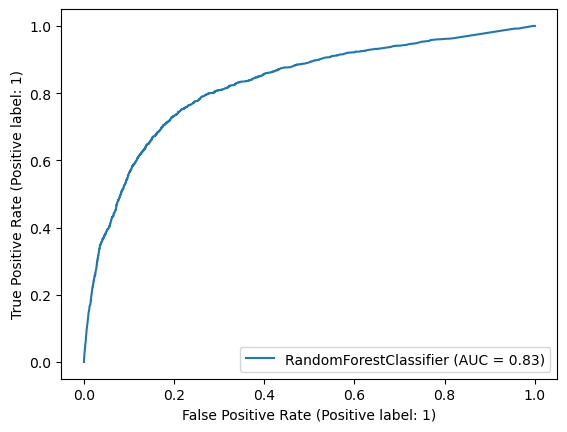

In [198]:
plot_roc_curve(rf, df_train_pca, y_train)
plt.show()

# Hyper-parameter tuning for the Random Forest

In [199]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [200]:
params = {
    'max_depth': [2,3,5],
    'min_samples_leaf': [50,100],
    'min_samples_split': [ 100, 150, ],
    'n_estimators': [100, 200 ]
}

In [201]:
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [202]:
grid_search.fit(df_train_pca, y_train)

Fitting 4 folds for each of 24 candidates, totalling 96 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5], 'min_samples_leaf': [50, 100],
                         'min_samples_split': [100, 150],
                         'n_estimators': [100, 200]},
             scoring='accuracy', verbose=1)

In [203]:
grid_search.best_score_

0.9177499999999998

In [204]:
grid_search.best_params_

{'max_depth': 2,
 'min_samples_leaf': 50,
 'min_samples_split': 100,
 'n_estimators': 100}

In [205]:
rfc_model = RandomForestClassifier(bootstrap=True,
                             max_depth=5,
                             min_samples_leaf=50, 
                             min_samples_split=100,
                             n_estimators=200)

In [206]:
rfc_model.fit(df_train_pca, y_train)

RandomForestClassifier(max_depth=5, min_samples_leaf=50, min_samples_split=100,
                       n_estimators=200)

In [207]:
evaluate_model(rfc_model)

Train Accuracy : 0.91775
Train Confusion Matrix:
[[22026     0]
 [ 1974     0]]
--------------------------------------------------
Test Accuracy : 0.9221796367272121
Test Confusion Matrix:
[[5534    0]
 [ 467    0]]
